 ## Análise exploratória Dating App



 Este dataset contém informações sobre clientes de um aplicativo de namoro, fornecido pelo Kaggle.



 As colunas analisadas incluem:



 gender, sexual_orientation, location_type, income_bracket, education_level, interest_tags, app_usage_time_min, app_usage_time_label,

 swipe_right_ratio, swipe_right_label, likes_received, mutual_matches, profile_pics_count, bio_length, message_sent_count, emoji_usage_rate,

 last_active_hour, swipe_time_of_day, match_outcome.

In [1]:
import kagglehub

# Baixar a versão mais recente do dataset
path = kagglehub.dataset_download("keyushnisar/dating-app-behavior-dataset")

print("Caminho para os arquivos do dataset:", path)


Caminho para os arquivos do dataset: /home/boto-cdr/.cache/kagglehub/datasets/keyushnisar/dating-app-behavior-dataset/versions/2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Carregar os dados
data = pd.read_csv('/YOUR/PATH/dating_app_behavior_dataset.csv')


In [4]:
# Exibir as primeiras linhas do dataframe
data.head(10)


,gender,sexual_orientation,location_type,income_bracket,education_level,interest_tags,app_usage_time_min,app_usage_time_label,swipe_right_ratio,swipe_right_label,likes_received,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour,swipe_time_of_day,match_outcome
0,Prefer Not to Say,Gay,Urban,High,Bachelor’s,"Fitness, Politics, Traveling",52,Moderate,0.60,Optimistic,173,23,4,44,75,0.36,13,Early Morning,Mutual Match
1,Male,Bisexual,Suburban,Upper-Middle,No Formal Education,"Languages, Fashion, Parenting",279,Extreme User,0.56,Optimistic,107,7,3,301,35,0.42,0,Morning,Chat Ignored
2,Non-binary,Pansexual,Suburban,Low,Master’s,"Movies, Reading, DIY",49,Moderate,0.41,Optimistic,91,27,2,309,33,0.41,1,After Midnight,Date Happened
3,Genderfluid,Gay,Metro,Very Low,Postdoc,"Coding, Podcasts, History",185,Extreme User,0.32,Balanced,147,6,5,35,5,0.07,21,Morning,No Action
4,Male,Bisexual,Urban,Middle,Bachelor’s,"Clubbing, Podcasts, Cars",83,High,0.32,Balanced,94,11,1,343,34,0.11,22,After Midnight,One-sided Like
5,Genderfluid,Lesbian,Small Town,High,Associate’s,"Anime, Clubbing, DIY",138,Addicted,0.62,Optimistic,163,22,4,112,87,0.18,10,Early Morning,Blocked
6,Male,Asexual,Metro,Lower-Middle,High School,"Tech, Makeup, Parenting",161,Addicted,0.38,Balanced,54,20,3,202,82,0.32,14,Morning,No Action
7,Female,Bisexual,Remote Area,Upper-Middle,Postdoc,"Spirituality, Sneaker Culture, Meditation",219,Extreme User,0.47,Optimistic,149,12,2,112,17,0.54,16,Evening,One-sided Like
8,Male,Gay,Suburban,High,Diploma,"MMA, Board Games, Startups",32,Moderate,0.23,Balanced,98,12,4,239,67,0.27,8,Late Night,Mutual Match
9,Prefer Not to Say,Gay,Remote Area,Upper-Middle,Bachelor’s,"Social Activism, Astrology, Photography",150,Addicted,0.68,Optimistic,111,5,3,1,92,0.27,23,Afternoon,Relationship Formed


In [5]:
# Exibir as informações gerais sobre o dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                50000 non-null  object 
 1   sexual_orientation    50000 non-null  object 
 2   location_type         50000 non-null  object 
 3   income_bracket        50000 non-null  object 
 4   education_level       50000 non-null  object 
 5   interest_tags         50000 non-null  object 
 6   app_usage_time_min    50000 non-null  int64  
 7   app_usage_time_label  50000 non-null  object 
 8   swipe_right_ratio     50000 non-null  float64
 9   swipe_right_label     50000 non-null  object 
 10  likes_received        50000 non-null  int64  
 11  mutual_matches        50000 non-null  int64  
 12  profile_pics_count    50000 non-null  int64  
 13  bio_length            50000 non-null  int64  
 14  message_sent_count    50000 non-null  int64  
 15  emoji_usage_rate   

In [6]:
# Verificar as colunas com dados numéricos
num = data.select_dtypes(include=['float64', 'int64']).columns
print('Colunas com dados numéricos:')

for coluna in num:
    print(coluna)


Colunas com dados numéricos:
app_usage_time_min
swipe_right_ratio
likes_received
mutual_matches
profile_pics_count
bio_length
message_sent_count
emoji_usage_rate
last_active_hour


In [7]:
# Verificar se há itens duplicados no dataset
duplicated = data.duplicated().sum()
print(f"Quantidade de itens duplicados: {duplicated}")


Quantidade de itens duplicados: 0


In [8]:
# Verificar se há dados nulos
nulos = data.isnull().sum()
print(f"Quantidade de valores nulos:\n{nulos}")


Quantidade de valores nulos:
gender                  0
sexual_orientation      0
location_type           0
income_bracket          0
education_level         0
interest_tags           0
app_usage_time_min      0
app_usage_time_label    0
swipe_right_ratio       0
swipe_right_label       0
likes_received          0
mutual_matches          0
profile_pics_count      0
bio_length              0
message_sent_count      0
emoji_usage_rate        0
last_active_hour        0
swipe_time_of_day       0
match_outcome           0
dtype: int64


In [9]:
# Exibir a descrição estatística de cada coluna numérica
data.describe()


,app_usage_time_min,swipe_right_ratio,likes_received,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000,50000.000000
mean,149.912400,0.500655,99.526040,13.870280,2.98772,250.174400,50.07194,0.286205,11.521800
std,86.990521,0.197468,57.996799,9.105615,1.99678,144.800996,29.16800,0.160042,6.920474
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,74.000000,0.370000,49.000000,6.000000,1.00000,125.000000,25.00000,0.160000,5.000000
50%,150.000000,0.500000,100.000000,13.000000,3.00000,250.000000,50.00000,0.270000,12.000000
75%,225.000000,0.640000,150.000000,22.000000,5.00000,376.000000,75.00000,0.390000,18.000000
max,300.000000,1.000000,200.000000,30.000000,6.00000,500.000000,100.00000,0.940000,23.000000


In [10]:
# Remover a coluna 'Unnamed: 0' se ela existir
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Remover colunas com quaisquer valores nulos
data = data.dropna(axis=1, how='any')

# Exibir as primeiras linhas para verificar as alterações
print(data.head())


              gender sexual_orientation location_type income_bracket  \
0  Prefer Not to Say                Gay         Urban           High   
1               Male           Bisexual      Suburban   Upper-Middle   
2         Non-binary          Pansexual      Suburban            Low   
3        Genderfluid                Gay         Metro       Very Low   
4               Male           Bisexual         Urban         Middle   

       education_level                  interest_tags  app_usage_time_min  \
0           Bachelor’s   Fitness, Politics, Traveling                  52   
1  No Formal Education  Languages, Fashion, Parenting                 279   
2             Master’s           Movies, Reading, DIY                  49   
3              Postdoc      Coding, Podcasts, History                 185   
4           Bachelor’s       Clubbing, Podcasts, Cars                  83   

  app_usage_time_label  swipe_right_ratio swipe_right_label  likes_received  \
0             Moderate   

In [11]:
# Atribuir o DataFrame a uma nova variável para conveniência
df = data

# Exibir as colunas para revisão
columns = df.columns
for i in columns:
    print(i)


gender
sexual_orientation
location_type
income_bracket
education_level
interest_tags
app_usage_time_min
app_usage_time_label
swipe_right_ratio
swipe_right_label
likes_received
mutual_matches
profile_pics_count
bio_length
message_sent_count
emoji_usage_rate
last_active_hour
swipe_time_of_day
match_outcome


In [12]:
# Exibir as primeiras linhas do DataFrame
df.head()


,gender,sexual_orientation,location_type,income_bracket,education_level,interest_tags,app_usage_time_min,app_usage_time_label,swipe_right_ratio,swipe_right_label,likes_received,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour,swipe_time_of_day,match_outcome
0,Prefer Not to Say,Gay,Urban,High,Bachelor’s,"Fitness, Politics, Traveling",52,Moderate,0.60,Optimistic,173,23,4,44,75,0.36,13,Early Morning,Mutual Match
1,Male,Bisexual,Suburban,Upper-Middle,No Formal Education,"Languages, Fashion, Parenting",279,Extreme User,0.56,Optimistic,107,7,3,301,35,0.42,0,Morning,Chat Ignored
2,Non-binary,Pansexual,Suburban,Low,Master’s,"Movies, Reading, DIY",49,Moderate,0.41,Optimistic,91,27,2,309,33,0.41,1,After Midnight,Date Happened
3,Genderfluid,Gay,Metro,Very Low,Postdoc,"Coding, Podcasts, History",185,Extreme User,0.32,Balanced,147,6,5,35,5,0.07,21,Morning,No Action
4,Male,Bisexual,Urban,Middle,Bachelor’s,"Clubbing, Podcasts, Cars",83,High,0.32,Balanced,94,11,1,343,34,0.11,22,After Midnight,One-sided Like


 ## Análises com a coluna `app_usage_time_min`

In [13]:
# Verificar o valor máximo de `app_usage_time_min`
df['app_usage_time_min'].max()


300

In [14]:
# Verificar o valor mínimo de `app_usage_time_min`
df['app_usage_time_min'].min()


0

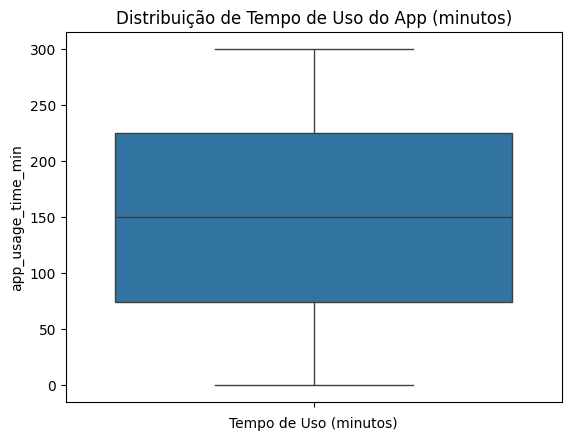

In [15]:
# Criar um boxplot para visualizar a distribuição de `app_usage_time_min`
sns.boxplot(df.app_usage_time_min)
plt.title('Distribuição de Tempo de Uso do App (minutos)')
plt.xlabel('Tempo de Uso (minutos)')
plt.show()


In [16]:
# Transformar a variável `app_usage_time_min` para tipo inteiro
df['app_usage_time_min'] = df['app_usage_time_min'].astype(int)


 ## Análise da coluna `Income_bracket` (Faixa de Renda)



 Neste ponto, podemos realizar uma análise para verificar se pessoas com maior renda gastam mais tempo na plataforma.

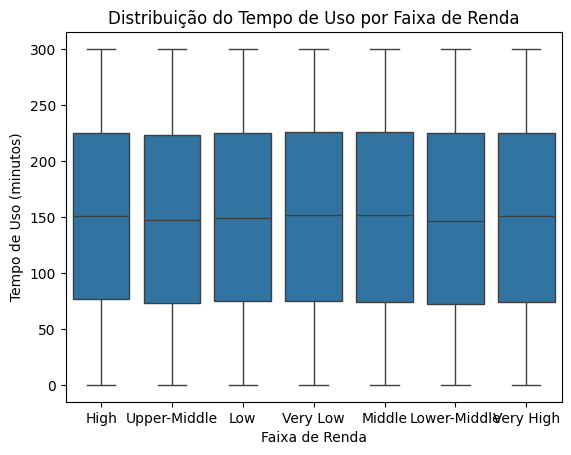

In [17]:
# Exemplo de boxplot para comparar o tempo de uso por categoria de faixa de renda
sns.boxplot(x='income_bracket', y='app_usage_time_min', data=df)
plt.title('Distribuição do Tempo de Uso por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Tempo de Uso (minutos)')
plt.show()


 ## Outras Análises (Exemplo)

 Aqui você pode adicionar outras análises exploratórias baseadas nas outras colunas, como `gender`, `sexual_orientation`, etc.

 ## Análise do Tempo de Uso do App (em minutos e horas)



 Aqui exploraremos a variável `app_usage_time_min` (tempo de uso do app em minutos) e faremos algumas transformações e visualizações.

In [18]:
# Verificando o tipo de dado da variável 'app_usage_time_min'
df['app_usage_time_min'].dtype


dtype('int64')

In [19]:
# Dividindo a variável 'app_usage_time_min' por 60 para transformar de minutos para horas
df['app_usage_time_min'] = df['app_usage_time_min'] / 60


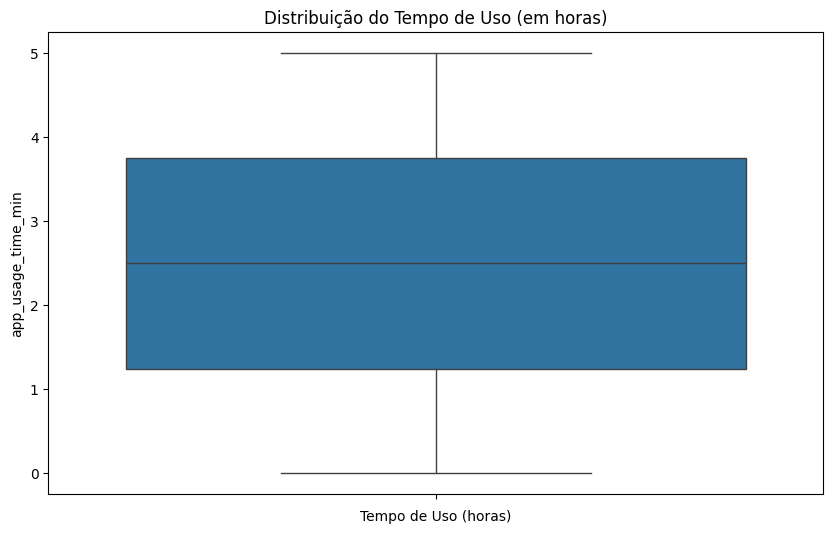

In [20]:
# Criando um boxplot para visualizar a distribuição do tempo de uso (em horas)
plt.figure(figsize=(10, 6))
sns.boxplot(df.app_usage_time_min)
plt.title('Distribuição do Tempo de Uso (em horas)')
plt.xlabel('Tempo de Uso (horas)')
plt.show()


In [21]:
# Descrição estatística da variável 'app_usage_time_min' (em horas)
df['app_usage_time_min'].describe()


count    50000.000000
mean         2.498540
std          1.449842
min          0.000000
25%          1.233333
50%          2.500000
75%          3.750000
max          5.000000
Name: app_usage_time_min, dtype: float64

In [22]:
# Convertendo a variável 'app_usage_time_min' de volta para horas para facilitar a análise
df['app_usage_time_hr'] = df['app_usage_time_min'] / 60


In [23]:
# Categorizando o tempo de uso como 'alto' ou 'baixo', com base em 60 minutos como limite
df['Categoria_app_usage_time_min'] = np.where(df['app_usage_time_min'] > 1, "gastam_muito", "gastam_pouco")


In [24]:
# Exibindo as primeiras 20 linhas do dataframe para verificar as novas transformações
df.head(20)


,gender,sexual_orientation,location_type,income_bracket,education_level,interest_tags,app_usage_time_min,app_usage_time_label,swipe_right_ratio,swipe_right_label,...,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour,swipe_time_of_day,match_outcome,app_usage_time_hr,Categoria_app_usage_time_min
0,Prefer Not to Say,Gay,Urban,High,Bachelor’s,"Fitness, Politics, Traveling",0.866667,Moderate,0.60,Optimistic,...,23,4,44,75,0.36,13,Early Morning,Mutual Match,0.014444,gastam_pouco
1,Male,Bisexual,Suburban,Upper-Middle,No Formal Education,"Languages, Fashion, Parenting",4.650000,Extreme User,0.56,Optimistic,...,7,3,301,35,0.42,0,Morning,Chat Ignored,0.077500,gastam_muito
2,Non-binary,Pansexual,Suburban,Low,Master’s,"Movies, Reading, DIY",0.816667,Moderate,0.41,Optimistic,...,27,2,309,33,0.41,1,After Midnight,Date Happened,0.013611,gastam_pouco
3,Genderfluid,Gay,Metro,Very Low,Postdoc,"Coding, Podcasts, History",3.083333,Extreme User,0.32,Balanced,...,6,5,35,5,0.07,21,Morning,No Action,0.051389,gastam_muito
4,Male,Bisexual,Urban,Middle,Bachelor’s,"Clubbing, Podcasts, Cars",1.383333,High,0.32,Balanced,...,11,1,343,34,0.11,22,After Midnight,One-sided Like,0.023056,gastam_muito
5,Genderfluid,Lesbian,Small Town,High,Associate’s,"Anime, Clubbing, DIY",2.300000,Addicted,0.62,Optimistic,...,22,4,112,87,0.18,10,Early Morning,Blocked,0.038333,gastam_muito
6,Male,Asexual,Metro,Lower-Middle,High School,"Tech, Makeup, Parenting",2.683333,Addicted,0.38,Balanced,...,20,3,202,82,0.32,14,Morning,No Action,0.044722,gastam_muito
7,Female,Bisexual,Remote Area,Upper-Middle,Postdoc,"Spirituality, Sneaker Culture, Meditation",3.650000,Extreme User,0.47,Optimistic,...,12,2,112,17,0.54,16,Evening,One-sided Like,0.060833,gastam_muito
8,Male,Gay,Suburban,High,Diploma,"MMA, Board Games, Startups",0.533333,Moderate,0.23,Balanced,...,12,4,239,67,0.27,8,Late Night,Mutual Match,0.008889,gastam_pouco
9,Prefer Not to Say,Gay,Remote Area,Upper-Middle,Bachelor’s,"Social Activism, Astrology, Photography",2.500000,Addicted,0.68,Optimistic,...,5,3,1,92,0.27,23,Afternoon,Relationship Formed,0.041667,gastam_muito


 ## Análise de Frequência do Tempo de Uso

In [25]:
# Contando a frequência de cada valor de 'app_usage_time_min' (tempo de uso em horas)
count = df['app_usage_time_min'].value_counts()
print(count)


app_usage_time_min
4.883333    208
1.183333    207
1.850000    207
4.866667    206
1.950000    194
           ... 
1.533333    141
2.066667    140
0.750000    137
1.433333    137
2.666667    137
Name: count, Length: 301, dtype: int64


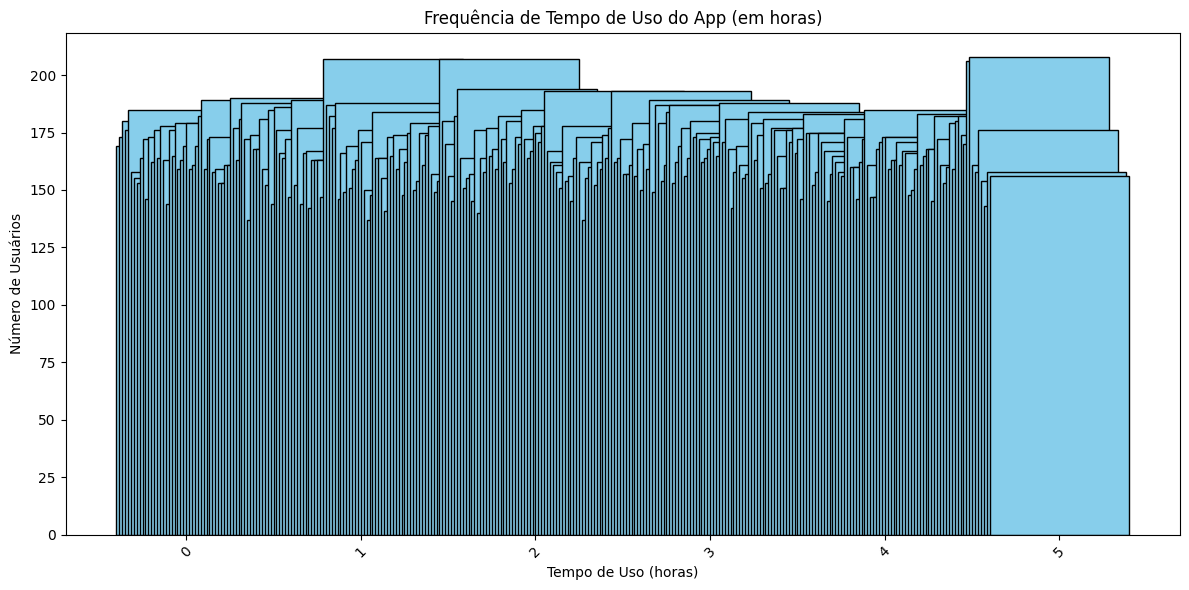

In [26]:
# Contando a frequência de cada valor de 'app_usage_time_min' e ordenando pelo índice
count = df['app_usage_time_min'].value_counts().sort_index()

# Criando o gráfico de barras para visualizar a frequência do tempo de uso (em horas)
plt.figure(figsize=(12, 6))
plt.bar(count.index, count.values, color='skyblue', edgecolor='black')
plt.title('Frequência de Tempo de Uso do App (em horas)')
plt.xlabel('Tempo de Uso (horas)')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 ## Distribuição do Tempo de Uso

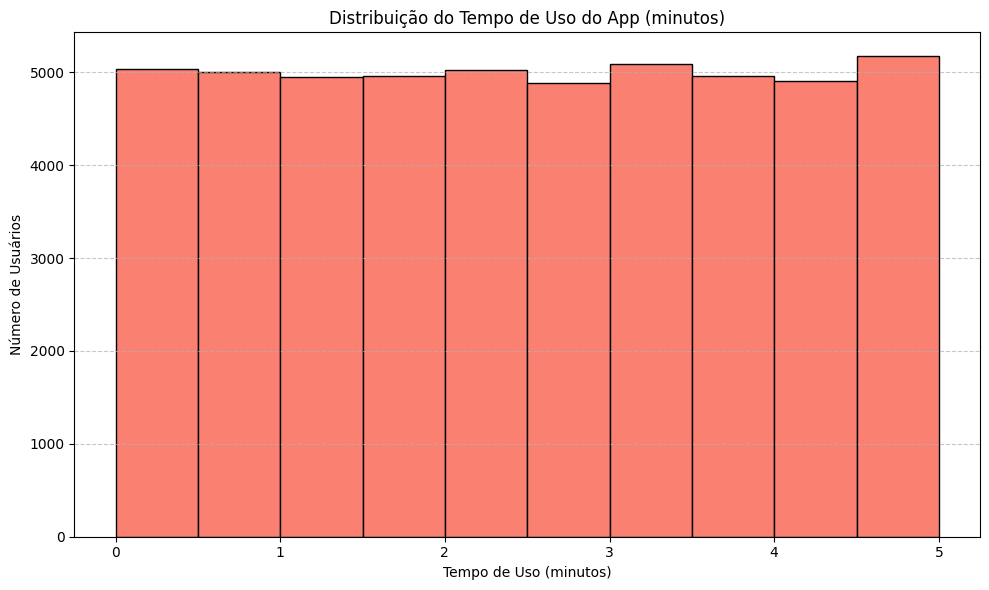

In [27]:
# Criando um histograma para visualizar a distribuição do tempo de uso (em minutos)
plt.figure(figsize=(10, 6))
plt.hist(df['app_usage_time_min'], bins=10, color='salmon', edgecolor='black')
plt.title('Distribuição do Tempo de Uso do App (minutos)')
plt.xlabel('Tempo de Uso (minutos)')
plt.ylabel('Número de Usuários')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 ### Ajuste da Distribuição com Mais Detalhes (Mais Bins)

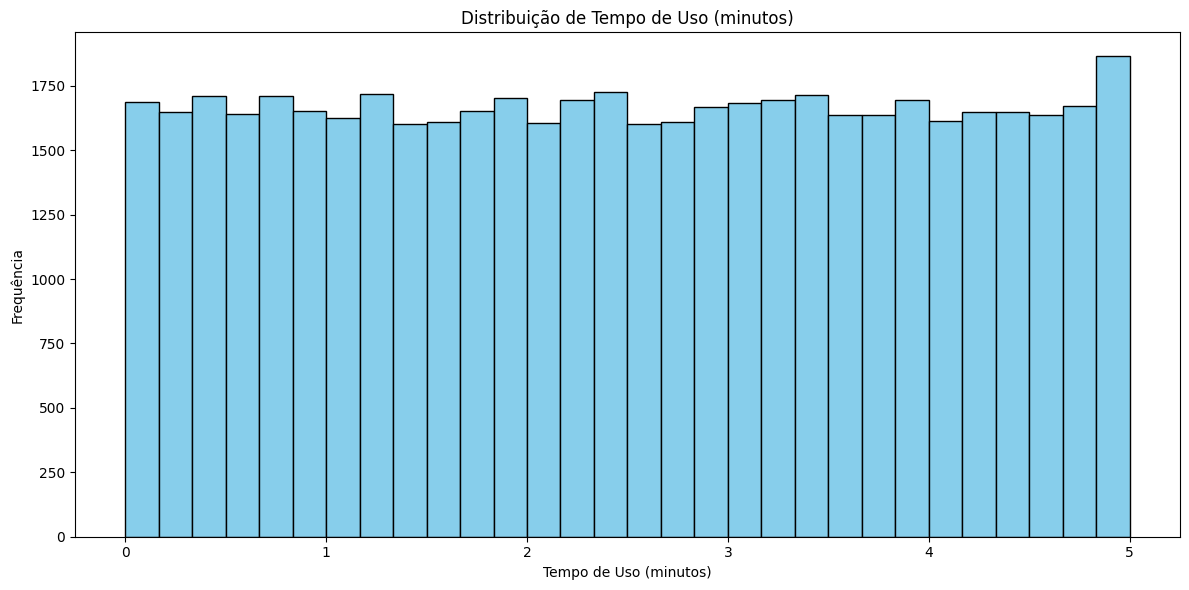

In [28]:
# Ajustando o número de bins para explorar melhor a distribuição do tempo de uso
plt.figure(figsize=(12, 6))
plt.hist(df['app_usage_time_min'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição de Tempo de Uso (minutos)')
plt.xlabel('Tempo de Uso (minutos)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


 ## Análise por Categoria de Hora de Swipe

/tmp/ipykernel_12472/139201933.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='swipe_time_of_day', y='app_usage_time_min', data=df, palette="coolwarm")


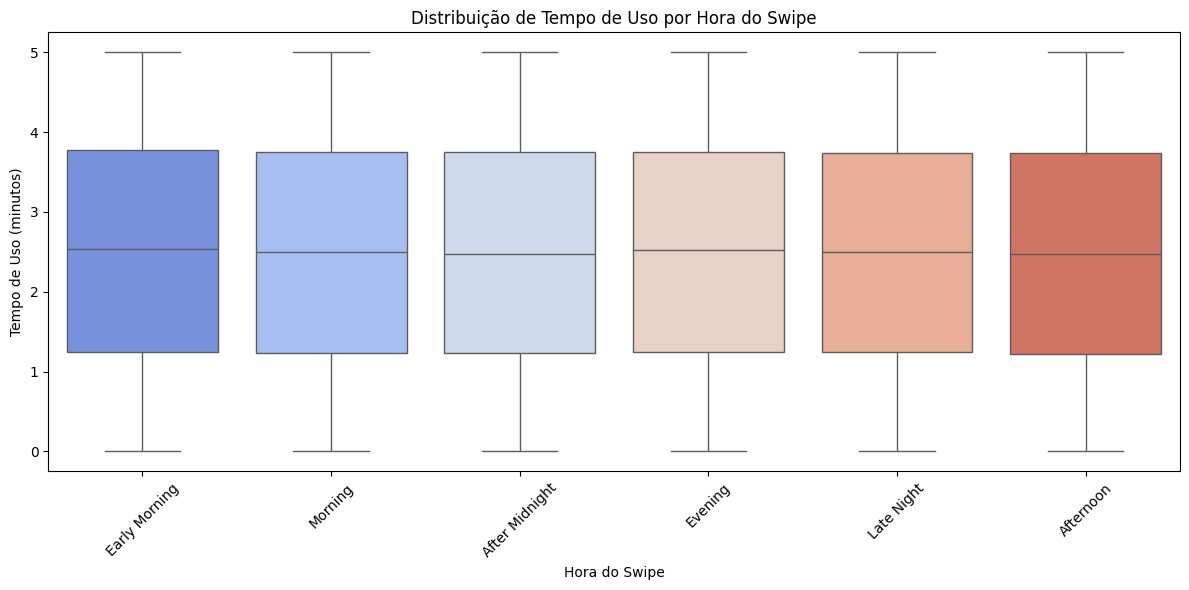

In [29]:
# Criando um boxplot para comparar a distribuição do tempo de uso por hora do swipe
plt.figure(figsize=(12, 6))
sns.boxplot(x='swipe_time_of_day', y='app_usage_time_min', data=df, palette="coolwarm")
plt.title('Distribuição de Tempo de Uso por Hora do Swipe')
plt.xlabel('Hora do Swipe')
plt.ylabel('Tempo de Uso (minutos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 ## Análise de Correlação entre Variáveis Numéricas

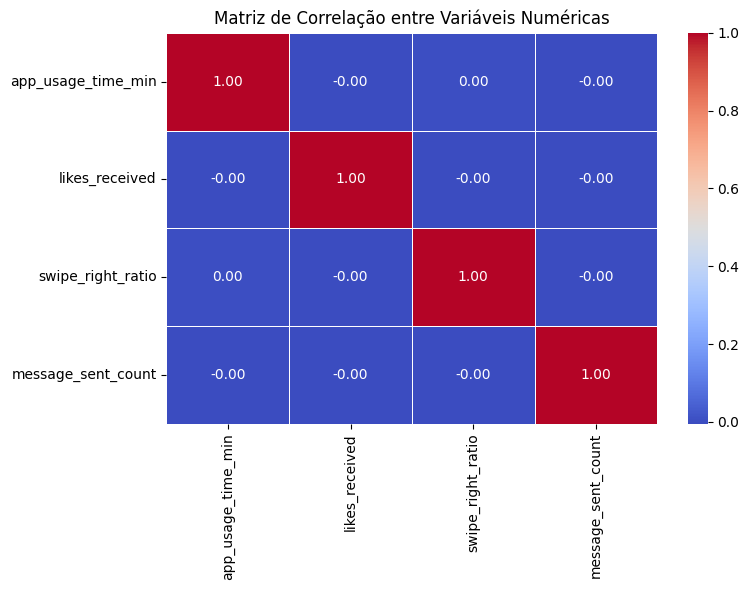

In [30]:
# Calculando a correlação entre algumas variáveis numéricas
correlation_matrix = df[['app_usage_time_min', 'likes_received', 'swipe_right_ratio', 'message_sent_count']].corr()

# Criando a matriz de correlação visualmente com um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()


 ## Análise Estatística e Exploratória do Tempo de Uso do App



 A seguir, realizamos uma série de análises estatísticas e exploratórias sobre o tempo de uso do app, incluindo desvio padrão, variância, valores únicos, outliers, análise por grupo e redução de dimensionalidade (PCA).

In [31]:
# 1. Verificar o Desvio Padrão e a Variância

# Calcular o desvio padrão e a variância para o tempo de uso do app em minutos
std_dev = df['app_usage_time_min'].std()
variance = df['app_usage_time_min'].var()

print(f"Desvio Padrão: {std_dev}")
print(f"Variância: {variance}")


Desvio Padrão: 1.449842021399407
Variância: 2.1020418870155186


 ## Análise de Valores Únicos e Frequência

 Verificaremos a quantidade de valores únicos e a frequência de valores na coluna de tempo de uso do app.

In [32]:
# 2. Analisar Valores Únicos e Frequência

# Verificando a quantidade de valores únicos
unique_values = df['app_usage_time_min'].nunique()
print(f"Valores únicos para 'app_usage_time_min': {unique_values}")


Valores únicos para 'app_usage_time_min': 301


 ## Análise de Outliers e Dados Faltantes

 Agora vamos analisar se existem valores faltantes e outliers na variável `app_usage_time_min`.

In [33]:
# 3. Análise de Outliers e Dados Faltantes

# Verificando valores faltantes
missing_values = df['app_usage_time_min'].isnull().sum()
print(f"Valores faltantes para 'app_usage_time_min': {missing_values}")

# Verificando outliers utilizando o método IQR (Interquartile Range)
Q1 = df['app_usage_time_min'].quantile(0.25)
Q3 = df['app_usage_time_min'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['app_usage_time_min'] < (Q1 - 1.5 * IQR)) | (df['app_usage_time_min'] > (Q3 + 1.5 * IQR))]
print(f"Outliers encontrados: {outliers.shape[0]}")


Valores faltantes para 'app_usage_time_min': 0
Outliers encontrados: 0


 ## Análise do Tempo de Uso por Grupo

 Aqui vamos analisar como o tempo de uso do app varia entre diferentes grupos, como por exemplo, por gênero.

In [34]:
# 4. Distribuições por Grupo

# Verificando a média de 'app_usage_time_min' por gênero
usage_by_gender = df.groupby('gender')['app_usage_time_min'].mean()
print(usage_by_gender)


gender
Female               2.534262
Genderfluid          2.505259
Male                 2.482782
Non-binary           2.498940
Prefer Not to Say    2.481972
Transgender          2.487709
Name: app_usage_time_min, dtype: float64


 ## Análise de Padrões Subjacentes com PCA

 Vamos aplicar PCA (Principal Component Analysis) para reduzir a dimensionalidade e explorar padrões subjacentes nos dados.

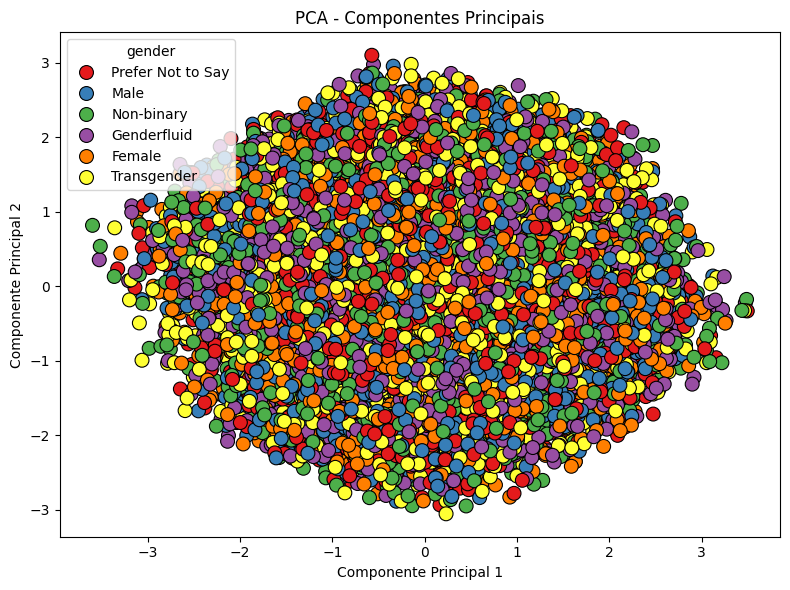

In [35]:
# 5. Visualização de Padrões Subjacentes com PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Padronizando os dados para PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['app_usage_time_min', 'likes_received', 'message_sent_count', 'swipe_right_ratio']])

# Aplicando PCA para reduzir os dados a 2 componentes principais
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Criando um DataFrame com os componentes principais
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plotando os componentes principais com a coloração por gênero
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pc_df['PC1'], y=pc_df['PC2'], hue=df['gender'], palette='Set1', s=100, edgecolor='black')
plt.title('PCA - Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.tight_layout()
plt.show()


 ## Análises com a Coluna Education Level

 A seguir, vamos explorar a distribuição de valores da coluna `education_level`, que descreve o nível de educação dos usuários.

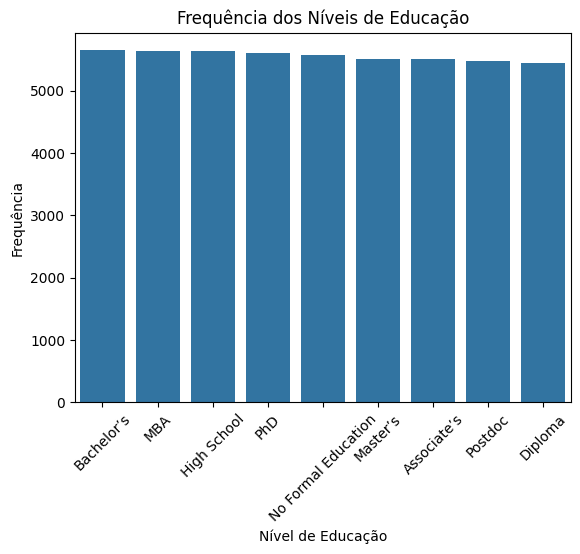

In [36]:
# 6. Distribuição de Frequência dos Níveis de Educação

# Contagem de frequências dos diferentes níveis de educação
contagem = df['education_level'].value_counts()

# Criando um gráfico de barras para visualizar a frequência dos níveis de educação
sns.barplot(x=contagem.index, y=contagem.values)
plt.xlabel('Nível de Educação')
plt.ylabel('Frequência')
plt.title('Frequência dos Níveis de Educação')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()


 ## Análise da Educação e Tempo de Uso por Categoria de Salário

 Vamos agrupar a coluna `education_level` com `Categoria_app_usage_time_min` para realizar uma análise gráfica.

In [37]:
# 7. Análise de `education_level` e `Categoria_app_usage_time_min`

# Agrupando as colunas 'education_level' e 'Categoria_app_usage_time_min' para análise
grouped = df.groupby(['education_level', 'Categoria_app_usage_time_min']).size().unstack()

# Visualizando o agrupamento (pode ser usado para gerar gráficos posteriormente)
print(grouped)


Categoria_app_usage_time_min  gastam_muito  gastam_pouco
education_level                                         
Associate’s                           4353          1146
Bachelor’s                            4519          1127
Diploma                               4299          1148
High School                           4537          1095
MBA                                   4447          1190
Master’s                              4383          1120
No Formal Education                   4382          1187
PhD                                   4504          1090
Postdoc                               4347          1126


 ## Análises Gráficas com a Coluna `Education Level`

 A seguir, exploramos a relação entre o nível de educação e a categoria de tempo de uso do app.

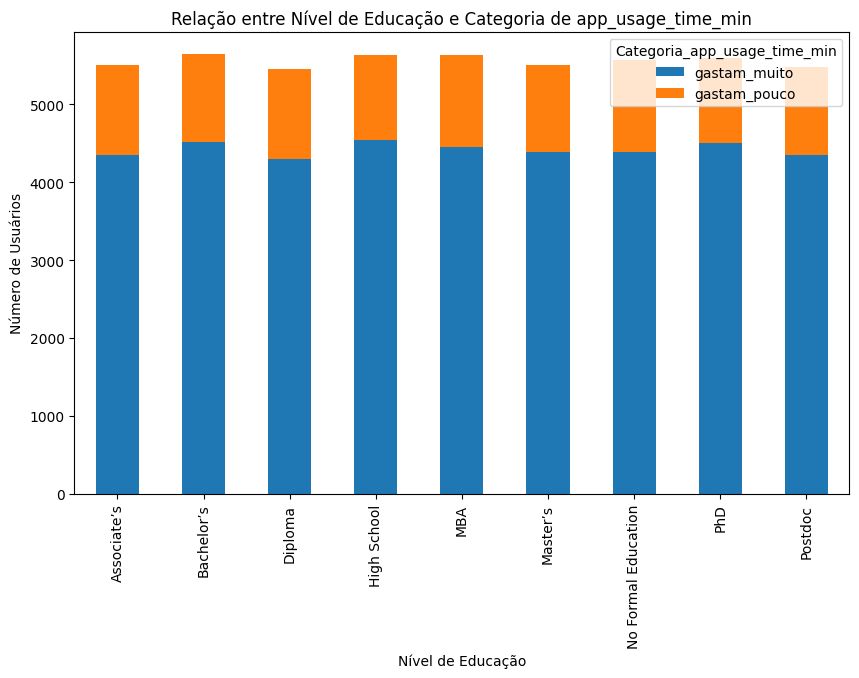

In [38]:
# 1. Gráfico de Barras Agrupadas

# Plotando um gráfico de barras empilhadas para visualizar a relação entre o nível de educação e a categoria de tempo de uso do app
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Relação entre Nível de Educação e Categoria de app_usage_time_min')
plt.xlabel('Nível de Educação')
plt.ylabel('Número de Usuários')
plt.show()


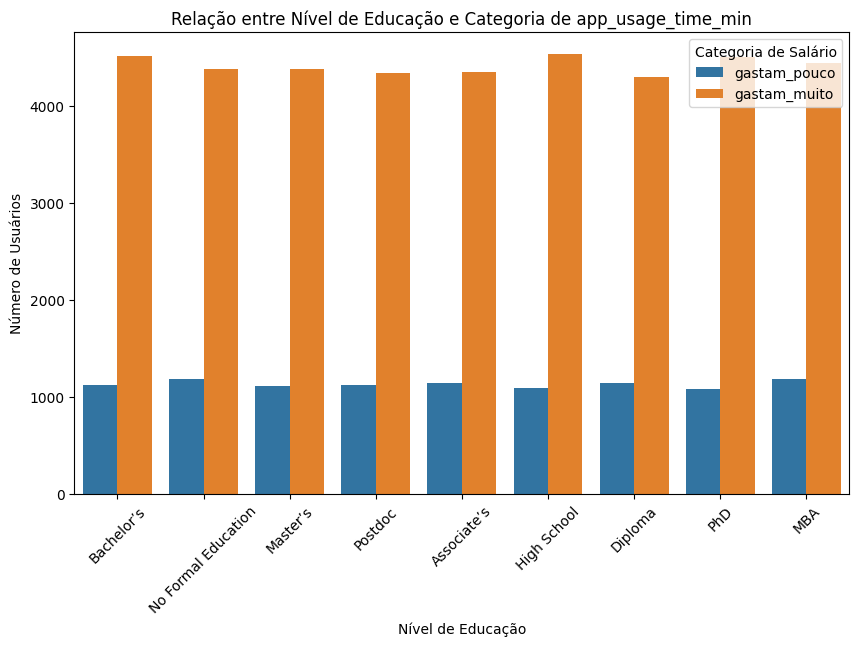

In [39]:
# 2. Gráfico de Barras Paralelas

# Criando um gráfico de barras paralelas para comparar a distribuição entre o nível de educação e a categoria de tempo de uso
plt.figure(figsize=(10, 6))
sns.countplot(x='education_level', hue='Categoria_app_usage_time_min', data=df)

plt.title('Relação entre Nível de Educação e Categoria de app_usage_time_min')
plt.xlabel('Nível de Educação')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=45)
plt.legend(title='Categoria de Salário')
plt.show()


 ## Análises com a Coluna `Sexual Orientation`

 A seguir, exploramos a variável `sexual_orientation` e sua relação com o número de `mutual_matches`.

sexual_orientation
Straight      6326
Lesbian       6315
Demisexual    6301
Queer         6288
Asexual       6254
Pansexual     6237
Bisexual      6158
Gay           6121
Name: count, dtype: int64


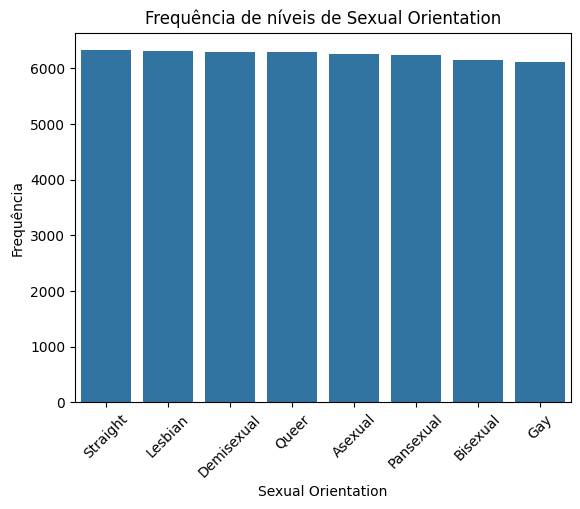

In [40]:
# 3. Frequência de `sexual_orientation`

# Verificando a frequência de cada nível de `sexual_orientation`
marital = df['sexual_orientation'].value_counts()
print(marital)

# Plotando um gráfico de barras para visualizar a frequência
sns.barplot(x=marital.index, y=marital.values)
plt.xlabel('Sexual Orientation')
plt.ylabel('Frequência')
plt.title('Frequência de níveis de Sexual Orientation')
plt.xticks(rotation=45)
plt.show()


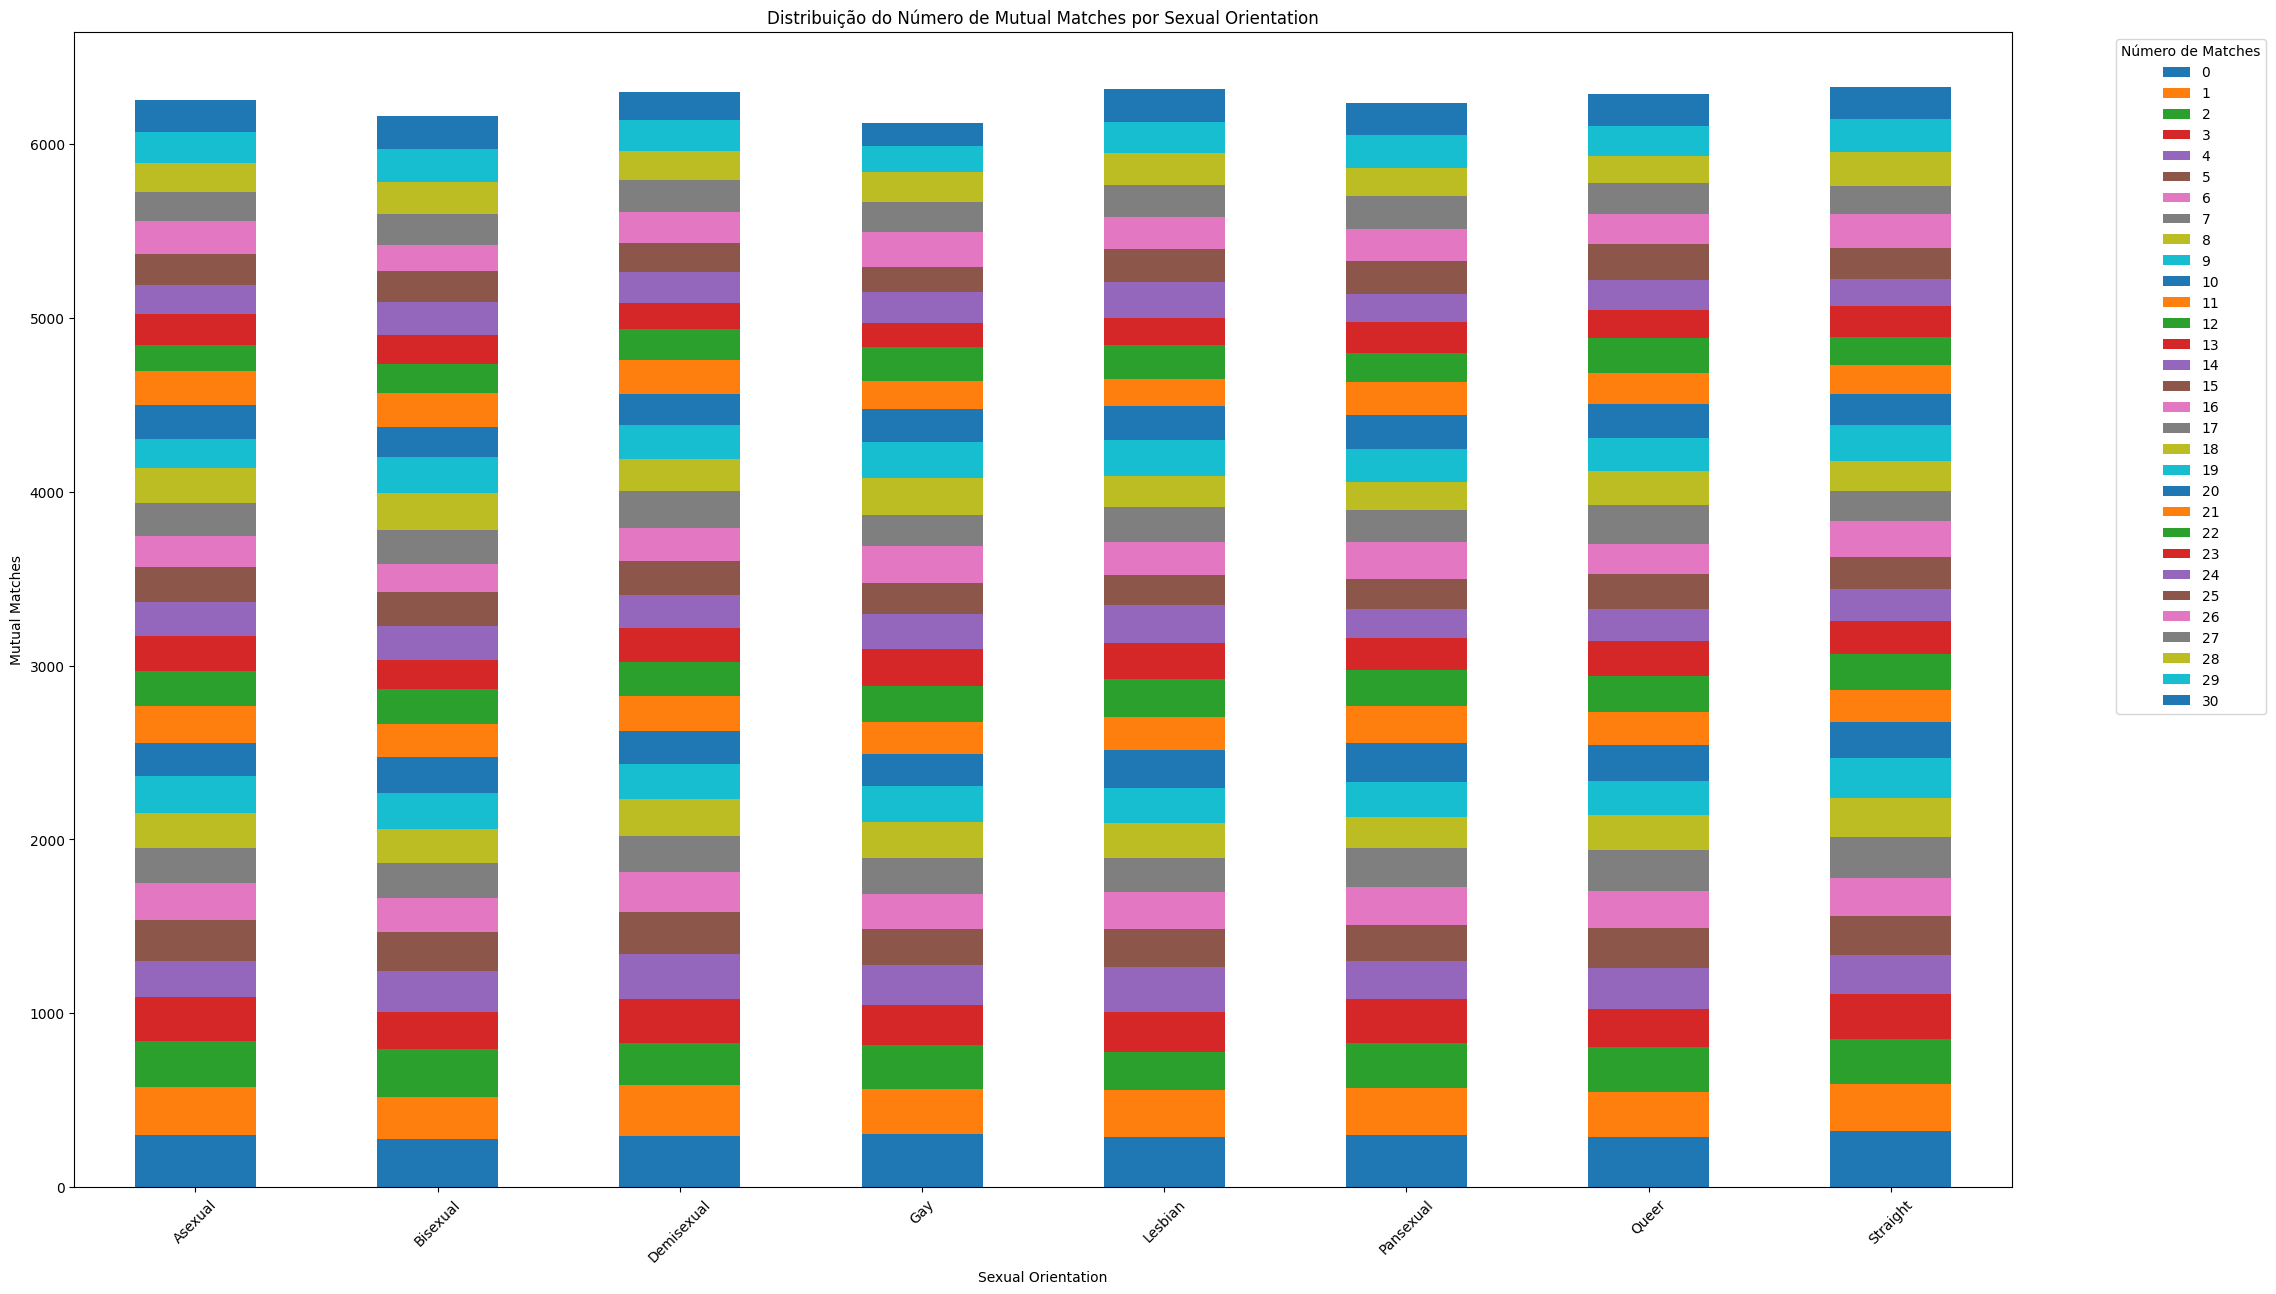

In [53]:
# 4. Distribuição de `mutual_matches` por `sexual_orientation` - Gráfico de Barras Empilhadas

# Agrupando `sexual_orientation` e `mutual_matches` para criar um gráfico de barras empilhadas
count = df.groupby(['sexual_orientation', 'mutual_matches']).size().unstack(fill_value=0)

# Plotando o gráfico de barras empilhadas
count.plot(kind='bar', stacked=True, figsize=(25, 15))
plt.xlabel('Sexual Orientation')
plt.ylabel('Mutual Matches')
plt.title('Distribuição do Número de Mutual Matches por Sexual Orientation')
plt.xticks(rotation=45)
plt.legend(title='Número de Matches', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()



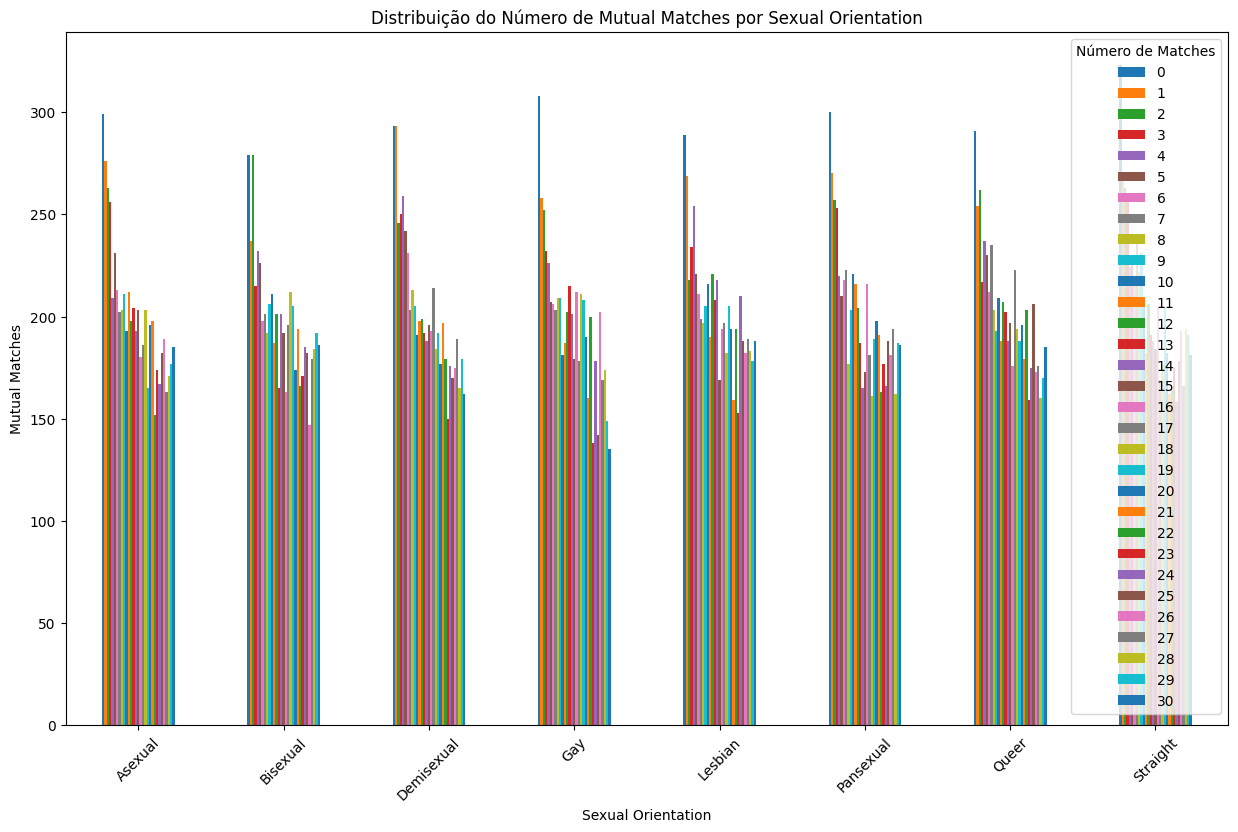

In [42]:
# 5. Gráfico de Barras Não Empilhadas

# Plotando o gráfico de barras não empilhadas para visualização mais clara da distribuição
count.plot(kind='bar', stacked=False, figsize=(15, 9))

# Adicionando rótulos e título
plt.xlabel('Sexual Orientation')
plt.ylabel('Mutual Matches')
plt.title('Distribuição do Número de Mutual Matches por Sexual Orientation')
plt.xticks(rotation=45)
plt.legend(title='Número de Matches')
plt.show()


/tmp/ipykernel_12472/2620240099.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sexual_orientation', y='count', hue='mutual_matches', data=count_melted, ci=None)


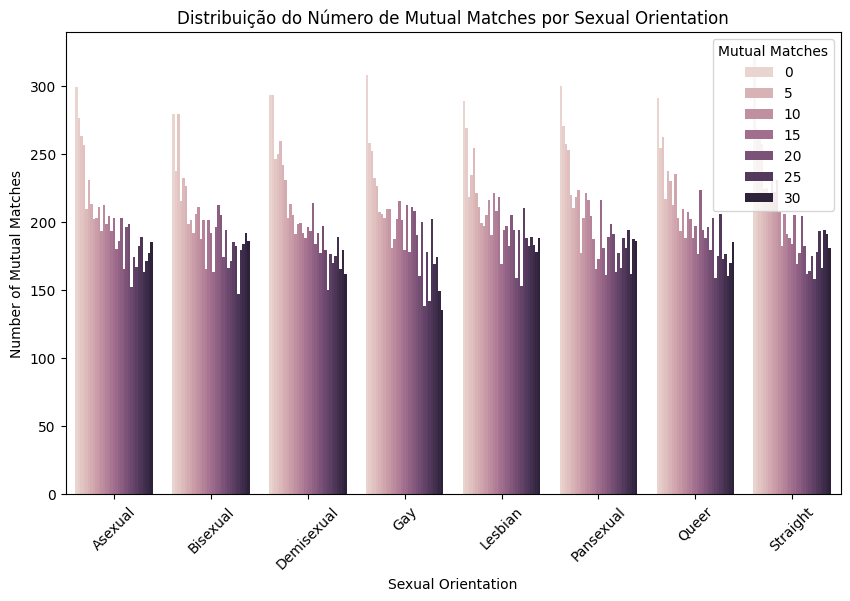

In [43]:
# 6. Gráfico de Barras Empilhadas com `melt` para Formato Longo

# Criando a contagem de combinações
count_reset = count.reset_index()
count_melted = count_reset.melt(id_vars=['sexual_orientation'], var_name='mutual_matches', value_name='count')

# Plotando o gráfico de barras empilhadas com seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='sexual_orientation', y='count', hue='mutual_matches', data=count_melted, ci=None)

plt.xlabel('Sexual Orientation')
plt.ylabel('Number of Mutual Matches')
plt.title('Distribuição do Número de Mutual Matches por Sexual Orientation')
plt.xticks(rotation=45)
plt.legend(title='Mutual Matches')
plt.show()


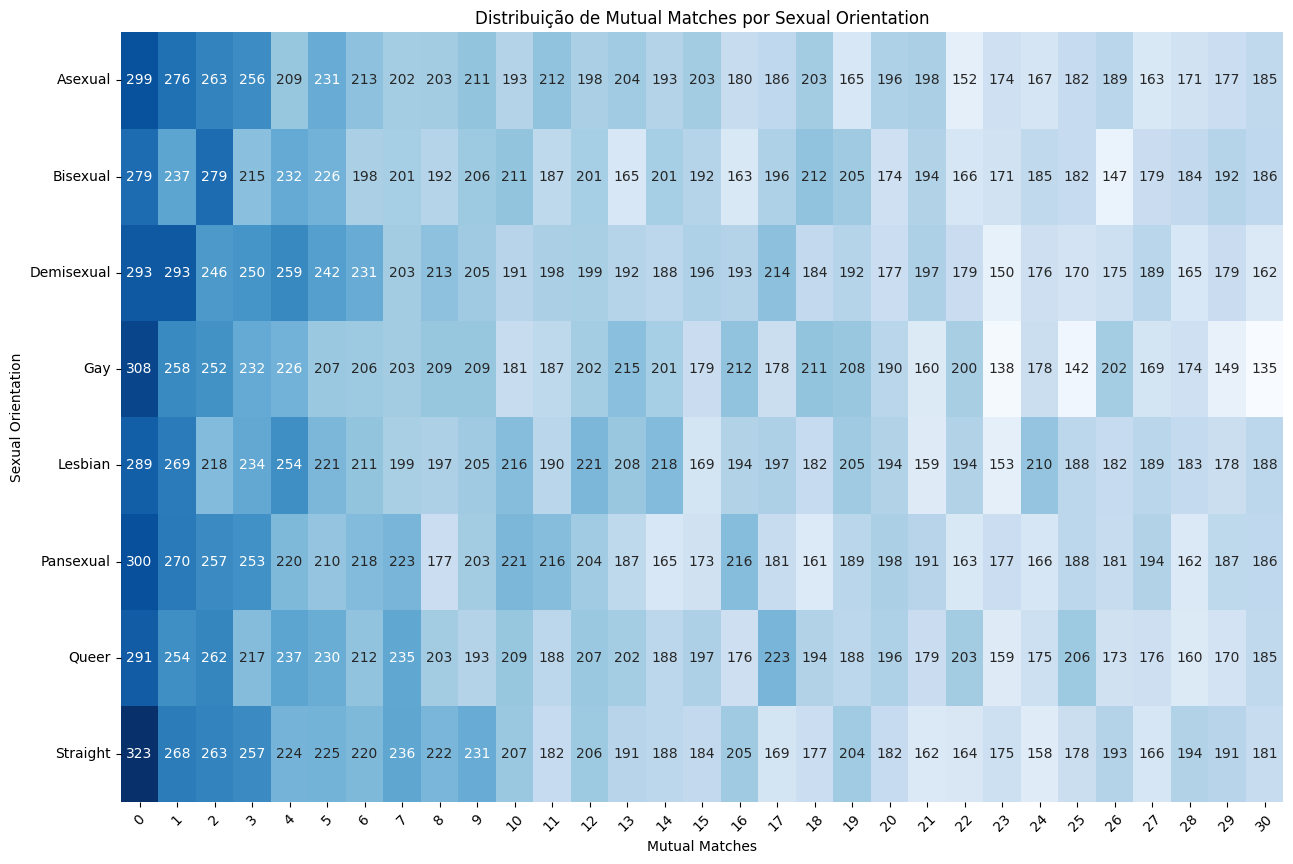

In [44]:
# 7. Heatmap da Distribuição de `Mutual Matches` por `Sexual Orientation`

# Criando o Heatmap para visualizar a distribuição de `mutual_matches` por `sexual_orientation`
plt.figure(figsize=(15, 10))
sns.heatmap(count, annot=True, cmap='Blues', fmt='d', cbar=False)

plt.xlabel('Mutual Matches')
plt.ylabel('Sexual Orientation')
plt.title('Distribuição de Mutual Matches por Sexual Orientation')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


 ## Análises com as Colunas `Profile Pics Count` e `Bio Length`

 Aqui, exploramos o impacto da quantidade de fotos de perfil e o tamanho da biografia no tempo de uso do app.

In [45]:
# 8. Limpeza de Dados - Remover Espaços Extras e Converter para Inteiro

# Removendo espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Convertendo a coluna 'profile_pics_count' para inteiro
df['profile_pics_count'] = df['profile_pics_count'].astype(int)

# Verificando as colunas após a limpeza
print(df.columns)


Index(['gender', 'sexual_orientation', 'location_type', 'income_bracket',
       'education_level', 'interest_tags', 'app_usage_time_min',
       'app_usage_time_label', 'swipe_right_ratio', 'swipe_right_label',
       'likes_received', 'mutual_matches', 'profile_pics_count', 'bio_length',
       'message_sent_count', 'emoji_usage_rate', 'last_active_hour',
       'swipe_time_of_day', 'match_outcome', 'app_usage_time_hr',
       'Categoria_app_usage_time_min'],
      dtype='object')


In [46]:
# 9. Converter 'bio_length' para Inteiro

# Convertendo a coluna 'bio_length' para inteiro
df['bio_length'] = df['bio_length'].astype(int)

# Verificando o tipo de dados da coluna 'profile_pics_count'
df['profile_pics_count'].dtype


dtype('int64')

 ## Análises do Impacto da Biografia e Tempo de Uso

 Exploramos a relação entre o comprimento da biografia e o tempo de uso do app, além da relação entre a categoria de tempo de uso e o tempo gasto na plataforma.

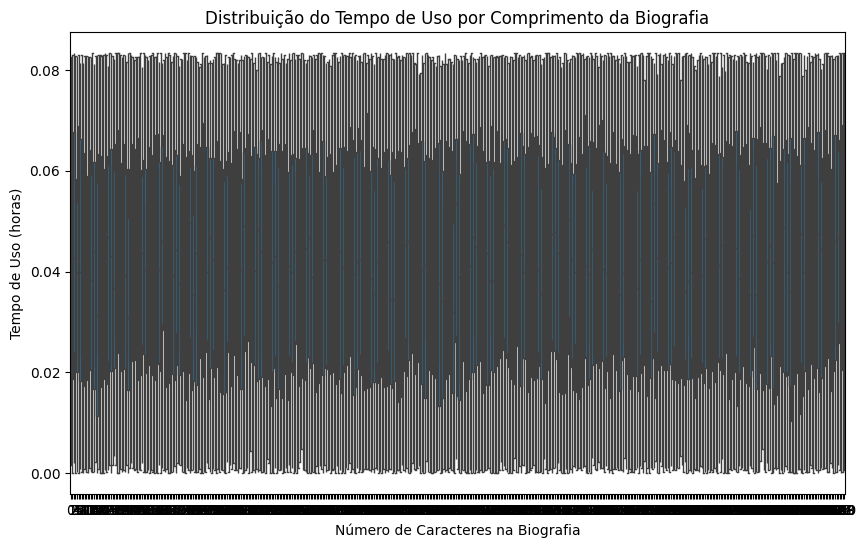

In [47]:
# 10. Analisando o Impacto do Comprimento da Biografia no Tempo de Uso

# Criando um gráfico de boxplot para verificar a distribuição do tempo de uso por comprimento da biografia
plt.figure(figsize=(10, 6))
sns.boxplot(x='bio_length', y='app_usage_time_hr', data=df)

plt.title('Distribuição do Tempo de Uso por Comprimento da Biografia')
plt.xlabel('Número de Caracteres na Biografia')
plt.ylabel('Tempo de Uso (horas)')
plt.show()


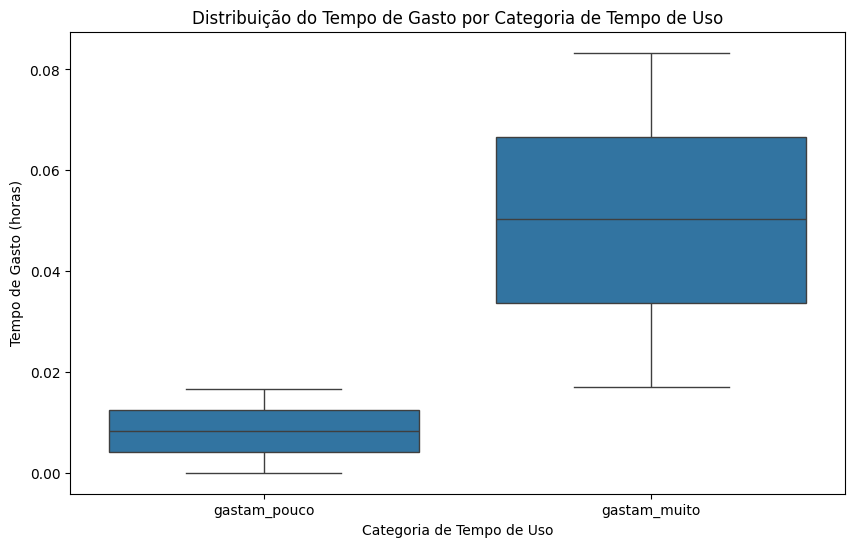

In [48]:
# 11. Analisando o Impacto da Categoria de Tempo de Uso no Tempo de Gasto na Plataforma

# Criando um gráfico de boxplot para verificar a distribuição do tempo gasto na plataforma por categoria de tempo de uso
plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoria_app_usage_time_min', y='app_usage_time_hr', data=df)

plt.title('Distribuição do Tempo de Gasto por Categoria de Tempo de Uso')
plt.xlabel('Categoria de Tempo de Uso')
plt.ylabel('Tempo de Gasto (horas)')
plt.show()


In [49]:
# 12. Verificar as Primeiras Linhas da Coluna 'Categoria_app_usage_time_min'

# Visualizando as primeiras linhas da coluna 'Categoria_app_usage_time_min'
print(df['Categoria_app_usage_time_min'].head())


0    gastam_pouco
1    gastam_muito
2    gastam_pouco
3    gastam_muito
4    gastam_muito
Name: Categoria_app_usage_time_min, dtype: object
